# CS 3400 Machine Learning - Lab 8: Gradient Descent

## Stuart Harley

### Introduction

In this lab, we will be implementing an iterative numerical optimization algorithm to solve for model variables in both scalar and vector forms. Aka we will be implementing a gradient descent algorithm. We will be applying this algorithm to exponential functions with 1 parameter, before applying it to the gaussian dataset to find the optimized parameters for mu and sigma.

### Importing Libraries

In [1]:
from optim import Optimizer
from test_optim import *
from cost_functions import GaussianCostFunction
import numpy as np
import matplotlib.pyplot as plt

### Testing Implementation of Optimizer

In [2]:
!python test_optim.py

......
----------------------------------------------------------------------
Ran 6 tests in 0.002s

OK


### Experiment 1: Cubic Model

$$ f(x) = x^{3} - 3x^{2} - 144x + 432 $$

$$ f'(x) = 3x^{2} - 6x -144 $$

In [3]:
def f(x):
    return (x * x * x) - (x * x * 3) - (144 * x) + 432

Plotting the cost function in order to visualize it.

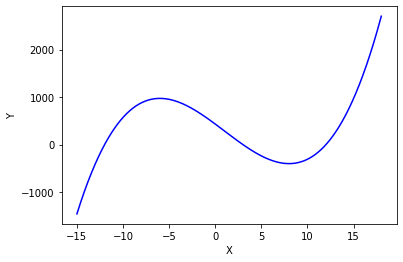

In [4]:
x = np.linspace(-15, 18, 3301) # step size of .01
fig, axes = plt.subplots()
axes.plot(x, f(x), c='b')
axes.set_xlabel('X')
axes.set_ylabel('Y');

Plotting the numerical derivative of the cubic model. Finding the 2 values that are equal/closest to to zero.

x values with derivative values equal to zero: [-6.  8.]


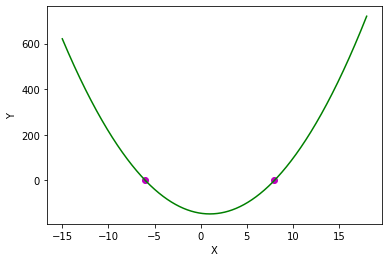

In [5]:
y = (3 * (x ** 2)) - (6 * x) - 144
low = np.sort(np.argpartition(np.abs(y), 2)[0:2])
print('x values with derivative values equal to zero: ' + str(x[low]))
fig, axes = plt.subplots()
axes.plot(x, y, c='g')
axes.scatter(x[low], y[low], c='m')
axes.set_xlabel('X')
axes.set_ylabel('Y');

Implementing a new cubic function class. Implements the objective function in a method called cost.

In [6]:
class CubicCostFunction:
    def cost(self, params):
        x = params[0]
        return (x * x * x) - (x * x * 3) - (144 * x) + 432

Solving for the minimum using our optimizer. Plotting a line from the starting point to the minima.

In [7]:
optimizer = Optimizer(.01, 100, .00001, .0001) # step_size, max_iter, tolerance, delta
cost = CubicCostFunction()
starting_params = np.array([0.])
(optimized_params, iters) = optimizer.optimize(cost, starting_params)
print('Start: 0, Found parameter: ' + str(optimized_params[0]) + \
      ', Iterations: ' + str(iters))

Start: 0, Found parameter: 7.999936770940508, Iterations: 27


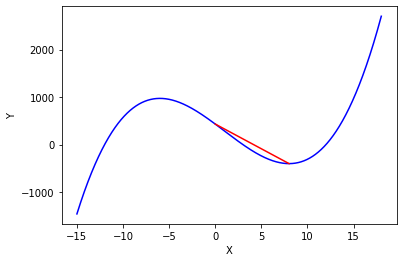

In [8]:
fig, axes = plt.subplots()
axes.plot(x, f(x), c='b')
axes.plot(np.array([0, 7.999936770940508]),\
          np.array([f(0), f(7.999936770940508)]), c='r')
axes.set_xlabel('X')
axes.set_ylabel('Y');

### Experiment 2: Quartic Model

$$ f(x) = 3x^{4} - 16x^{3} - 18x^{2} $$

$$ f'(x) = 12x^{3} - 48x^{2} - 36x $$

In [9]:
def f(x):
    return (x * x * x * x * 3) - (x * x * x * 16) - (x * x * 18)

Plotting the cost function to visualize.

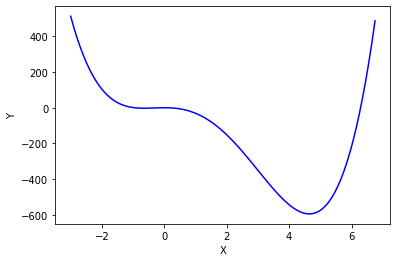

In [10]:
x = np.linspace(-3, 6.75, 99) # step size of .1
fig, axes = plt.subplots()
axes.plot(x, f(x), c='b')
axes.set_xlabel('X')
axes.set_ylabel('Y');

Plotting the numerical derivative of the quartic model. Finding the 3 values that are equal/closest to to zero.

x values with derivative values closest to zero: [-0.01530612 -0.6122449   4.66071429]


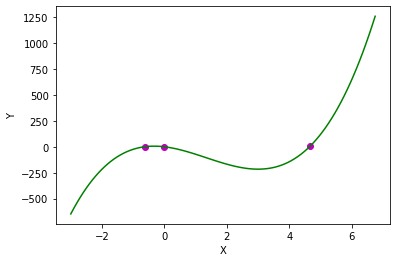

In [11]:
y = (x * x * x * 12) - (x * x * 48) - (x * 36)
low = np.take(np.argsort(np.abs(y)), [0,1,6])
print('x values with derivative values closest to zero: ' + str(x[low]))
fig, axes = plt.subplots()
axes.plot(x, y, c='g')
axes.scatter(x[low], y[low], c='m')
axes.set_xlabel('X')
axes.set_ylabel('Y');

Implementing a new quartic function class. Implements the objective function in a method called cost.

In [12]:
class QuarticCostFunction:
    def cost(self, params):
        x = params[0]
        return (x * x * x * x * 3) - (x * x * x * 16) - (x * x * 18)

Solving for the minimum using our optimizer. Starting at 3 different starting points. (6, 3, -2). Plotting a line from the starting point to the minima.

In [13]:
optimizer = Optimizer(.001, 1000, .00001, .0001) # step_size, max_iter, tolerance, delta
cost = QuarticCostFunction()
starting_params = np.array([6.])
(optimized_params, iters) = optimizer.optimize(cost, starting_params)
print('Start: 6, Found parameter: ' + str(optimized_params[0]) + \
      ', Iterations: ' + str(iters))
starting_params = np.array([3.])
(optimized_params, iters) = optimizer.optimize(cost, starting_params)
print('Start: 3, Found parameter: ' + str(optimized_params[0]) + \
      ', Iterations: ' + str(iters))
starting_params = np.array([-2.])
(optimized_params, iters) = optimizer.optimize(cost, starting_params)
print('Start: -2, Found parameter: ' + str(optimized_params[0]) + \
      ', Iterations: ' + str(iters))

Start: 6, Found parameter: 4.64572056195243, Iterations: 30
Start: 3, Found parameter: 4.645681855920884, Iterations: 36
Start: -2, Found parameter: -0.6460310097476789, Iterations: 176


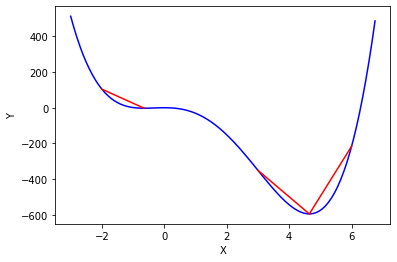

In [14]:
fig, axes = plt.subplots()
axes.plot(x, f(x), c='b')
axes.plot(np.array([6, 4.64572056195243]), \
          np.array([f(6), f(4.64572056195243)]), c='r')
axes.plot(np.array([3, 4.645681855920884]), \
          np.array([f(3), f(4.645681855920884)]), c='r')
axes.plot(np.array([-2, -0.6460310097476789]) \
          , np.array([f(-2), f(-0.6460310097476789)]), c='r')
axes.set_xlabel('X')
axes.set_ylabel('Y');

### Experiment 3: Gaussian Model

Loading in Gaussian dataset. Creating a gaussian cost function from that data. Plotting the dataset to visualize. Plotting the original predictions with parameters mu=1, sigma=.75

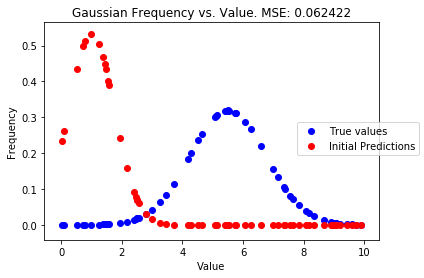

In [15]:
gauss = np.loadtxt('gaussdist.csv', delimiter=',')
gauss_feat = gauss[:,0]
gauss_resp = gauss[:,1]
gauss_cost = GaussianCostFunction(gauss_feat, gauss_resp)
pred_y = gauss_cost.predict(gauss_feat, (1, .75))
cost = gauss_cost.cost((1, .75))
fig, axes = plt.subplots()
axes.scatter(gauss_feat, gauss_resp, color='b', label='True values')
axes.scatter(gauss_feat, pred_y, color='r', label='Initial Predictions')
axes.set_xlabel('Value')
axes.set_ylabel('Frequency')
axes.set_title('Gaussian Frequency vs. Value. MSE: ' + str(round(cost, 6)))
fig.legend(loc=5);

Solving for the minimum using our optimizer.

In [16]:
optimizer = Optimizer(1, 5000, .0001, .001) # step_size, max_iter, tolerance, delta
starting_params = np.array([1, .75])
(optimized_params, iters) = optimizer.optimize(gauss_cost, starting_params)
print('Start: mu=1, sigma=.75\nFound parameters: mu=' + str(optimized_params[0]) + \
      ' sigma=' + str(optimized_params[1]) + '\nIterations: ' + str(iters))

Start: mu=1, sigma=.75
Found parameters: mu=5.490459061464256 sigma=1.250687698767924
Iterations: 3031


Plotting the true values against our predicted values with the found parameters.

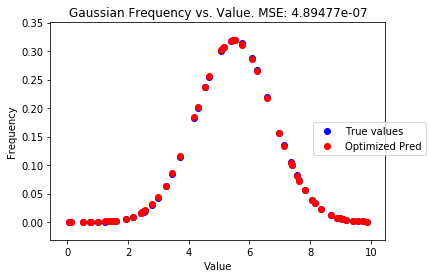

In [17]:
pred_y = gauss_cost.predict(gauss_feat, (5.490459061464256, 1.250687698767924))
cost = gauss_cost.cost((5.490459061464256, 1.250687698767924))
fig, axes = plt.subplots()
axes.scatter(gauss_feat, gauss_resp, color='b', label='True values')
axes.scatter(gauss_feat, pred_y, color='r', label='Optimized Pred')
axes.set_xlabel('Value')
axes.set_ylabel('Frequency')
axes.set_title('Gaussian Frequency vs. Value. MSE: ' + str(round(cost, 12)))
fig.legend(loc=5);

### Reflection Questions

1. Reflect on the form and organization of our optimizer API. Specifically, discuss each of the methods and what role they serve. This discussion should include what arguments they accept, what the method returns, and why we might choose to separate out these specific methods into helper methods. 

- For our optimizer class, the init method obviously is used when instantiating. The calculate_change method is used to calculate the difference between the new and old values. This is so once the change gets below the specified tolerance, the optimization will be stopped. It doesn't need to be any more accuracte. The gradient method calculates the gradient with the current params so that the optimizer knows which way to adjust the parameters. The update method calculates the new params by multiplying the gradient by the step size. Then optimize method puts all of the previous methods together in a loop that terminates after the tolerance is greater than the change, or the max iterations has been reached. It returns the optimized parameters. We choose to make these helper methods so the code is more readible also so if we want to reuse parts of the optimize method later, we don't have to rewrite the portions we want.

2. For experiment 1: How many optima did you find? Hint: Discuss the significance of places where the derivative is equal to 0.

- I found 1 optima. These are the 2 places where the derivative equals zero. However, only one is a minima. The places where the derivative is 0 are important because these are the local minima and maxima of the function.

2. When you used the optimizer you started at x = 0. How many optima did your optimizer return? Was it a minima or maxima? Was it a global or local optima? By looking at the gradient descent algorithm find what term pointed you toward the minimum. Describe how it did this. Can you think of a way to find the function’s maxima?

- The optimizer returns 1 optima. This is the minima of the function. It is a local optima because the ends of the function go to negative and positive infinity. From the gradient descent algorithm (out optimize method) the term that pointed us towards the minima was the gradient. Specifically the sign of the gradient tells us which way to move. If we wanted to find the function's maxima, instead of subtracting the gradient * step_size from the parameters in the update method, we would add it.

3. For experiment 2: How many optima did you find? 

- I found 2 optima.

3. Describe the different starting locations that you used to solve for optima. Was the found optima different for any of these starting locations and were they the global or local optima? If it was, can you explain why the optimizer found different solutions?

- For 2 of the staring locations, I found the global minima/optima. However, for the furthermost left starting point, I found the local minima/optima. This is because the optimizer method follows the slope of the function downhill, and once it gets to a spot where the slope is zero then it stops, even if it's only a local minima.

4. For experiment 3: How many optima did you find? 

- I found 1 optima

4. Look back at the heatmaps you generated in Lab06 for the gaussian distribution. Describe what the optimizer is doing using the heatmap visualization.

- The optimizer is following the heatmaps moving towards areas of lower heat (spots with lower error).